In [16]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from linearlrp import LinearLRPLayer

In [17]:
from dataloader import MNISTDataLoader
from model import CNN, LRP_CNN, train_model

import matplotlib.pyplot as plt


In [18]:

def plot_input_image(image):
    image = image.view(28, 28).cpu().numpy()  # Reshape and convert to numpy for plotting
    plt.imshow(image, cmap='gray')
    plt.title("Input Image")
    plt.axis('off')
    plt.show()


In [19]:
def plot_relevance_scores(relevance_scores, input_image):
    # Assuming relevance_scores is already in [28, 28] shape after the above steps
    input_image = input_image.view(28, 28).cpu().numpy()

    # Normalize the relevance scores
    relevance_scores = (relevance_scores - relevance_scores.min()) / (relevance_scores.max() - relevance_scores.min())

    # Plot the original image
    plt.imshow(input_image, cmap='gray', alpha=0.6)
    
    # Overlay the relevance scores as a heatmap
    plt.imshow(relevance_scores, cmap='jet', alpha=0.4)
    plt.title("Relevance Scores Overlay")
    plt.axis('off')
    plt.show()







In [20]:

# Load MNIST data
train_loader, test_loader = MNISTDataLoader.load_mnist_data()

# Initialize the model
model1 = CNN()

model = LRP_CNN()

# Train the model
train_model(model, train_loader, test_loader, epochs=5, learning_rate=0.001)



Epoch [1/5], Loss: 0.2305
Accuracy: 96.41%
Epoch [2/5], Loss: 0.0934
Accuracy: 97.53%
Epoch [3/5], Loss: 0.0635
Accuracy: 97.39%
Epoch [4/5], Loss: 0.0509
Accuracy: 97.70%
Epoch [5/5], Loss: 0.0378
Accuracy: 97.72%


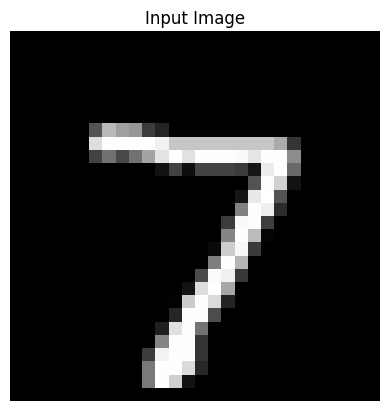

RuntimeError: shape '[28, 28]' is invalid for input of size 10

In [21]:
# Select a single image from the test set
for images, labels in test_loader:
    input_image = images[0].unsqueeze(0)  # Select the first image and add batch dimension
    break

# Assuming 'input_image' is your input tensor
plot_input_image(input_image)

# Apply LRP
model.eval()  # Set the model to evaluation mode
output = model(input_image, explain=True, rule='lrp0')
predicted_class = output.argmax(dim=1).item()

# To get the relevance map, we need to backpropagate from the predicted class
relevance_scores = torch.zeros_like(output)
relevance_scores[0, predicted_class] = 1.0  # Start with 1 for the predicted class

# Backpropagate relevance scores to the input
relevance_scores = model(input_image, explain=True, rule='lrp0')

# Reshape and plot relevance scores
relevance_scores_for_input = relevance_scores.view(28, 28).cpu().detach().numpy()

# Plot the relevance map overlaid on the input image
plot_relevance_scores(relevance_scores_for_input, input_image)